In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-093b8950-f404-9d6e-99cf-04f17a7df6f8)


##Get Helper Functions

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-08-28 05:31:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-08-28 05:31:52 (99.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import unzip_data, create_tensorboard_callback,plot_loss_curves,compare_historys

##Get the text dataset

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
unzip_data("nlp_getting_started.zip")

--2023-08-28 05:31:56--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.128, 142.251.175.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K   726KB/s    in 0.8s    

2023-08-28 05:31:57 (726 KB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



##Visualizing the text data set

In [ ]:
import pandas as pd
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
#Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
#How many examples of each class
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
#How many total samples
len(train_df), len(test_df)

(7613, 3263)

In [ ]:
#Visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5) #create random indexes not higher than the length of the sampel
for row in train_df_shuffled[["text","target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}","(real disaster)" if target>0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 1 (real disaster)
Text:
TV program I saw said US air plane flew to uranium mine in Fukushima and attacked by machine gun when student army were digging it.

---

Target: 0 (not real disaster)
Text:
Quality Metrics Penalties May Harm Patient Care PCPs Say - Primary care physicians generally hold positive views... http://t.co/0w12PwPSfx

---

Target: 0 (not real disaster)
Text:
RT @HuffPostComedy: We should build a wall that keeps Burning Man attendees from coming home http://t.co/xwVW1sft4I http://t.co/j7HUKhWmal

---

Target: 0 (not real disaster)
Text:
Last Chance Animal Rescue has 3 new posts. http://t.co/1EB2DaUYfn #animalrescue

---

Target: 0 (not real disaster)
Text:
Wait until i tell my college friend who reafs bloody mary too about the drama cd

---



###Split data into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, #using 10 percent of data for val set
                                                                            random_state=42)

In [ ]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
#CHeck the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

##Converting text into numbers

**Tokenization -** direct mapping of token ( a token could be a word or a character) to number

**Embedding -** create a matrix of feature vector for each token ( the size of the feature vector can be defined and this embedding can be learned)

###Text vectorization (Tokenization)

In [ ]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

#Use the default TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens = 100000000000, #how many words in the vocabulary
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None, #create group of n-words,
                                    output_mode = "int",#How to map tokens to numbers
                                    output_sequence_length=None, #How long do you want your sequences to be
                                    pad_to_max_tokens = True)

In [ ]:
#Find the average number of tokens(words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
#Setup text vectorization variables
max_vocab_length = 10000 # Max number of words to have in the vocabulary
max_length = 15 # max length our sequences will be

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
#Fit the text vectorozer to the training text
text_vectorizer.adapt(train_sentences)

In [ ]:
#Create a sample sentences and tokenize it
sample_sentence = "There's a lood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3,   1,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
#Choose a random sentence form the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
        \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
 My 2 fav worlds have collided! Thanks to @lennonparham @Jessica_StClair I found the @GilmoreGuysShow podcast!! #ihave44episodesofGG #nojoke        

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  13,   70, 2460, 1101,   24,  321,  565,    5,    1,    1,    8,
         225,    2,    1, 9710]])>

In [ ]:
#Get the unique words in the vocabulary
words_in_vocab =  text_vectorizer.get_vocabulary() # get all of the unique words in our training data
top_5_words = words_in_vocab[:5] # get the most common words
bottom_5_words = words_in_vocab[-5:] # get the least common words
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


###Creating an Embedding using an Embedding layer

The parameters we care most about for our embedding layer:
* **'input_dim'** = the size of our vocabulary
* **'output_dim'** = the size of the output embedding vector, for example, a value of 100 would mean each token gets represented by a vector 100 long
* **'input_length'** = length of the sequences being passed to the embedding layer

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length, # set input shape
                             output_dim=128,
                             embeddings_initializer = "uniform",
                             input_length = max_length # how long is each input
                             )
embedding

In [ ]:
#Get random sentences from the training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
        \n\nEmbedded version:")

#Embed the random sentence (turn it into)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 @stury Note there were no passengers on board when the train derailed this morning.        

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.04986203,  0.00918477, -0.03411629, ..., -0.008254  ,
         -0.02611759, -0.0283862 ],
        [-0.00455568,  0.04645963,  0.04481632, ..., -0.01472553,
         -0.01786612,  0.03229772],
        [ 0.01450405, -0.03864678,  0.02826697, ...,  0.00656331,
         -0.03563629,  0.03874408],
        ...,
        [-0.04409163,  0.02652908,  0.03633102, ...,  0.02760145,
          0.04336884, -0.00977658],
        [ 0.04726311, -0.04360247, -0.03691701, ...,  0.04137366,
         -0.04786871,  0.04519917],
        [ 0.03026928, -0.02886748,  0.03937853, ...,  0.04798244,
         -0.02842361, -0.03824455]]], dtype=float32)>

In [ ]:
#Check out a single token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-4.9862027e-02,  9.1847666e-03, -3.4116291e-02,  3.6794949e-02,
         1.2114417e-02, -3.0290091e-02,  4.1541670e-02, -3.5276264e-04,
        -1.3209879e-05,  2.9333416e-02,  1.8739607e-02, -4.3013383e-02,
        -4.8182070e-02,  4.1403558e-02,  1.9727778e-02,  2.9480580e-02,
         2.5823627e-02,  3.1987514e-02,  4.8446897e-02,  1.9964207e-02,
        -1.0215163e-02,  4.1700710e-02, -4.1962456e-02, -1.0460485e-02,
        -4.3813527e-02,  4.5609619e-02, -4.9873341e-02, -2.7995635e-02,
         3.4132037e-02, -8.0417469e-04,  3.5855863e-02,  2.2623766e-02,
        -4.5484077e-02, -2.8679252e-02,  3.3511590e-02,  3.1286489e-02,
         2.8253678e-02, -1.4358580e-02,  5.3475052e-04, -7.1121827e-03,
        -2.8377866e-02, -4.4231441e-02,  4.7703292e-02,  4.8900392e-02,
         2.4072852e-02,  1.3491038e-02, -3.9186366e-03, -1.5257526e-02,
        -1.6550325e-02,  2.8370861e-02,  4.7294106e-02,  3.2633543e-04,
        -1.5832

## Modelling a text dataset (running a series of experiments)

* Model 0: Naive bayes (baseline)
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model (RNN)
* Model 3: GRU model (RNN)
* Model 4: Bidirectional-LSTM model (RNN)
* Model 5: 1D Convolutional Neural Network (CNN)
* Model 6: Tensorflow Hub Pretrained Feature Extractor (using transfer learning for NLP)
* Model 7: Same as model 6 with 10% of training data


###Model 0: Getting a baseline

As with all machine learning modelling experiments, its importqnt to create a baseline model so you've got a benchmark for future experiments to build upon.

To create the baseline, we'll use sklearn multinomial naive bayes using TF-IDF formula to convert our words to numbers.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# create tokenization and modelling pipeline
model_0 = Pipeline([
    ("tfid", TfidfVectorizer()), # convert words to numbers using Tfidf
    ("clf", MultinomialNB()) #Model the text
])

#Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfid', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluate the base line model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our base line models a accuracy of: {baseline_score*100:.2f}%")

Our base line models a accuracy of: 79.27%


In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
val_labels[:20]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

### Creating an evaluation function for the model experiments

In [ ]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

###Model 1: A simple dense model

In [ ]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [ ]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [ ]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of the model
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20230828-053201
Epoch 1/5
215/215 [==============================] - 35s 141ms/step - loss: 0.6111 - accuracy: 0.6944 - val_loss: 0.5344 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.4414 - accuracy: 0.8194 - val_loss: 0.4692 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.3465 - accuracy: 0.8593 - val_loss: 0.4585 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2839 - accuracy: 0.8913 - val_loss: 0.4667 - val_accuracy: 0.7913
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2375 - accuracy: 0.9120 - val_loss: 0.4878 - val_accuracy: 0.7927


In [ ]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 6ms/step - loss: 0.4878 - accuracy: 0.7927


[0.4878488779067993, 0.7926509380340576]

In [ ]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 [==============================] - 0s 2ms/step


(762, 1)

In [ ]:
#Convert the model prediction probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [ ]:
#calculate the model_1 results
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred = model_1_preds)
model_1_results

{'accuracy': 79.26509186351706,
 'precision': 0.80143183257555,
 'recall': 0.7926509186351706,
 'f1': 0.7886584277593334}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

###Vizualizing learned embeddings


In [ ]:
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Get the weight matrix of embedding layer

embed_weights = model_1.get_layer("embedding").get_weights()
embed_weights

[array([[ 0.01092124, -0.04957886,  0.06156258, ...,  0.07239751,
         -0.04934935, -0.02033784],
        [ 0.00916659,  0.01630472,  0.0542668 , ...,  0.0012289 ,
         -0.02494851, -0.00862154],
        [-0.03595382, -0.02141667,  0.03961924, ...,  0.02578925,
         -0.05211068,  0.03784218],
        ...,
        [-0.01311802,  0.02073808, -0.04792634, ..., -0.02307866,
          0.01983868, -0.049373  ],
        [-0.00507687, -0.0766281 ,  0.05711178, ...,  0.0181871 ,
         -0.0651614 ,  0.05582971],
        [-0.01448885, -0.10310061,  0.04347733, ...,  0.02603992,
         -0.10797439,  0.08504363]], dtype=float32)]

##Recurrent Neurl Network (RNN's)

RNN's are useful for sequence data

The premise of a recurrent neural netowrk is due to use the representation of a previous inout to aid the representation of a later input.

###Model 2: LSTM

LSTM - Long Short Term Memory

The stricture of an RNN is typically like:

Input -> Tokenize -> Embedding -> Layers (RNN/dense) -> Output (label probability)

Input shape: [batch, timesteps, feature]

In [ ]:
#create an LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.LSTM(units=64, return_sequences=True)(x)
print(x.shape)
x = layers.LSTM(64)(x)
print(x.shape)
x = layers.Dense(64, activation="relu")(x)
print(x.shape)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 15, 64)
(None, 64)
(None, 64)


In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                      

In [ ]:
#compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
#Fit the model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230828-053326
Epoch 1/5
215/215 [==============================] - 25s 91ms/step - loss: 0.2257 - accuracy: 0.9190 - val_loss: 0.6514 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 8s 37ms/step - loss: 0.1595 - accuracy: 0.9429 - val_loss: 0.5961 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 5s 21ms/step - loss: 0.1320 - accuracy: 0.9501 - val_loss: 0.6148 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 4s 17ms/step - loss: 0.1068 - accuracy: 0.9585 - val_loss: 0.8149 - val_accuracy: 0.7822
Epoch 5/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0863 - accuracy: 0.9673 - val_loss: 1.2782 - val_accuracy: 0.7769


In [ ]:
#make predictions with LSTM model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 1s 5ms/step


array([[4.2118022e-04],
       [5.9023625e-01],
       [9.9997652e-01],
       [4.7296917e-04],
       [2.8445367e-05],
       [9.9982089e-01],
       [9.5669711e-01],
       [9.9998677e-01],
       [9.9997663e-01],
       [5.0559437e-01]], dtype=float32)

In [ ]:
#convert model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
#calculate model 2 results
model_2_results = calculate_results(y_true= val_labels,
                                    y_pred = model_2_preds)
model_2_results

{'accuracy': 77.69028871391076,
 'precision': 0.7798819103655997,
 'recall': 0.7769028871391076,
 'f1': 0.7743498017353971}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

###Model 3: GRU

Another popular and effective RNN component is the GRU or Gated Recurrent Unit.

GRU cell has similar feature to LSTM but has less features

In [ ]:
# Build an RNN using the GRU cell
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
#x = layers.GRU(64, return_sequences = True)(x) # if you want to stack recurrent layers
#print(x.shape)
#x = layers.LSTM(42, return_sequences = True)(x)
#print(x.shape)
#x = layers.GRU(99)(x)
#print(x.shape)
#x = layers.Dense(64, activation="relu")(x)
#print(x.shape)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

(None, 15, 128)


In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [ ]:
model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,"model_3_GRU")])


Saving TensorBoard log files to: model_logs/model_3_GRU/20230828-053414
Epoch 1/5
215/215 [==============================] - 21s 80ms/step - loss: 0.1590 - accuracy: 0.9400 - val_loss: 0.7119 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 6s 27ms/step - loss: 0.0870 - accuracy: 0.9676 - val_loss: 0.8222 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0738 - accuracy: 0.9726 - val_loss: 0.8327 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0620 - accuracy: 0.9771 - val_loss: 0.8910 - val_accuracy: 0.7638
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0554 - accuracy: 0.9765 - val_loss: 1.1934 - val_accuracy: 0.7703


In [ ]:
#Make some predictions with the GRU model
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[1.0162196e-02],
       [8.0929327e-01],
       [9.9985504e-01],
       [4.2019140e-02],
       [1.3101668e-04],
       [9.9968958e-01],
       [6.7328042e-01],
       [9.9995744e-01],
       [9.9992263e-01],
       [9.4143105e-01]], dtype=float32)

In [ ]:
#convert model 3 pred probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
#calculate the model 3 results
model_3_results = calculate_results(y_true = val_labels,
                                    y_pred = model_3_preds)
model_3_results

{'accuracy': 77.03412073490814,
 'precision': 0.7709806133638261,
 'recall': 0.7703412073490814,
 'f1': 0.7688058109983439}

###Model 4: Bidirectional RNN

Normal RNN's go from left to right (just like you'd read an English sentence) however, a bidirectional RNN goes from right to left as well as left to right

In [ ]:
#Build a bidirectional RNN's

from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.GRU(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

In [ ]:
#get summary
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 15, 128)          98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              74496     
 nal)                                                            
                                             

In [ ]:
#compile model
model_4.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
#Fit the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,"model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20230828-053448
Epoch 1/5
215/215 [==============================] - 33s 120ms/step - loss: 0.0979 - accuracy: 0.9704 - val_loss: 1.0368 - val_accuracy: 0.7480
Epoch 2/5
215/215 [==============================] - 6s 26ms/step - loss: 0.0552 - accuracy: 0.9772 - val_loss: 1.0028 - val_accuracy: 0.7638
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0479 - accuracy: 0.9793 - val_loss: 1.4525 - val_accuracy: 0.7756
Epoch 4/5
215/215 [==============================] - 4s 19ms/step - loss: 0.0425 - accuracy: 0.9809 - val_loss: 1.3873 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0416 - accuracy: 0.9799 - val_loss: 1.4011 - val_accuracy: 0.7598


In [ ]:
#Make predictions with the bidirectional
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 3s 8ms/step


array([[6.6221049e-03],
       [6.9056058e-01],
       [9.9980420e-01],
       [2.8219333e-01],
       [1.5224005e-05],
       [9.9944991e-01],
       [6.3475090e-01],
       [9.9993849e-01],
       [9.9988663e-01],
       [3.6542732e-01]], dtype=float32)

In [ ]:
#convert pred probs to pred probs
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
#calculate the model 4 results
model_4_results = calculate_results(y_true = val_labels,
                                    y_pred = model_4_preds)
model_4_results

{'accuracy': 75.98425196850394,
 'precision': 0.7598710707718088,
 'recall': 0.7598425196850394,
 'f1': 0.758578322737536}

##Convolutional Neural Network for Text (and other types of sequences)

- CNN is generally used for images but images are typically 2D (height x width)
- Previously we used Conv2D
- The typical structure of a conv1D model for the sequence is:

Inputs(text) -> Tokenization -> Embedding -> Layers (typically conv1D and pooling) -> Outputs (class probabilities)

###Model 5: Conv1D

In [ ]:
#Test out our embedding layer, conv1D layer and max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) #turn the target into a embedding
conv_1d = layers.Conv1D(filters=32,
                       kernel_size=5,
                       activation="relu",
                       padding="valid")
conv_1d_output = conv_1d(embedding_test) # pass test embedding through conv1d layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [ ]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
conv_1d = layers.Conv1D(filters = 32,
                  kernel_size = 5,
                  activation = "relu",
                  padding = "valid")
x = conv_1d(x)
max_pool = layers.GlobalMaxPooling1D()
x = max_pool(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_conv1d")

In [ ]:
model_5.summary()

Model: "model_5_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_5 (Dense)             (None, 1)              

In [ ]:
#Compile model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, "model_5_conv1d")])

Saving TensorBoard log files to: model_logs/model_5_conv1d/20230828-054555
Epoch 1/5
215/215 [==============================] - 15s 53ms/step - loss: 0.1290 - accuracy: 0.9613 - val_loss: 0.8654 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 5s 25ms/step - loss: 0.0751 - accuracy: 0.9717 - val_loss: 0.9894 - val_accuracy: 0.7612
Epoch 3/5
215/215 [==============================] - 3s 16ms/step - loss: 0.0617 - accuracy: 0.9761 - val_loss: 1.0820 - val_accuracy: 0.7598
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0547 - accuracy: 0.9778 - val_loss: 1.1540 - val_accuracy: 0.7585
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0503 - accuracy: 0.9784 - val_loss: 1.1948 - val_accuracy: 0.7546


In [ ]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[8.9816988e-02],
       [8.8369012e-01],
       [9.9975532e-01],
       [4.4643395e-02],
       [2.2527246e-07],
       [9.9483454e-01],
       [9.2122108e-01],
       [9.9995220e-01],
       [9.9999940e-01],
       [6.7932254e-01]], dtype=float32)

In [ ]:
model_5.predictions = tf.squeeze(tf.round(model_5_pred_probs))
model_5.predictions[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_5_results = calculate_results(y_true = val_labels,
                                    y_pred = model_5.predictions)
model_5_results

{'accuracy': 75.45931758530183,
 'precision': 0.7547954838468575,
 'recall': 0.7545931758530183,
 'f1': 0.7530724049375026}

###Model 6: TensorFlow Hub Pretrained Sentence Encoder

In [ ]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,
                       "When you use the universal sentence encoder on a sentence, it turns it into numbers."])
print(embed_samples[0][:50])

tf.Tensor(
[ 0.01908966  0.04080064  0.01892564  0.01538774  0.03459463  0.02661576
  0.00634957  0.04190659  0.00341535 -0.04650896 -0.00852711  0.02794925
  0.05780409  0.1232101  -0.0047798  -0.04176819 -0.01368649 -0.02167631
  0.01333152 -0.08958013 -0.03267954 -0.04514163  0.0062303  -0.02142684
 -0.0574793   0.00267373 -0.0048349  -0.00818982 -0.04515358  0.05928698
 -0.01728742  0.05361253  0.0392598   0.04681643  0.01016581 -0.03599995
  0.04559076  0.05128206 -0.01563998 -0.10150588  0.03862489  0.02665683
 -0.03387737  0.08212978 -0.11832542 -0.05887791 -0.03065928 -0.04521522
  0.03216717  0.00837991], shape=(50,), dtype=float32)


In [ ]:
embed_samples[0].shape

TensorShape([512])

In [ ]:
#create a keras layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [ ]:
#Create model using the sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

#compile
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Train a classifier on top of USE pretrained embeddings
model_6.history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230828-064512
Epoch 1/5
215/215 [==============================] - 5s 17ms/step - loss: 0.5040 - accuracy: 0.7752 - val_loss: 0.4444 - val_accuracy: 0.8005
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4137 - accuracy: 0.8148 - val_loss: 0.4354 - val_accuracy: 0.8058
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4010 - accuracy: 0.8206 - val_loss: 0.4278 - val_accuracy: 0.8150
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3922 - accuracy: 0.8247 - val_loss: 0.4356 - val_accuracy: 0.8058
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3849 - accuracy: 0.8317 - val_loss: 0.4234 - val_accuracy: 0.8189


In [ ]:
#Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 11ms/step


array([[0.18871728],
       [0.7581847 ],
       [0.99075985],
       [0.18466051],
       [0.6815682 ],
       [0.69898945],
       [0.9847562 ],
       [0.9790308 ],
       [0.9460792 ],
       [0.09193844]], dtype=float32)

In [ ]:
#Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
#Calculate model 6 performance metrics
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)
model_6_results

{'accuracy': 81.88976377952756,
 'precision': 0.8203089036947304,
 'recall': 0.8188976377952756,
 'f1': 0.8177314483416845}

###Model 7: TF Hub Pretrained USE but with 10% of training data

In [ ]:
#  ##NOTE: Making data splits like below leads to data leakage (model_7 trained on 10% data, outperforms model on 100% of data)
#  ## DO NOT MAKE DATA SPLITS WHICH LEAK DATA FROM VALIDATION/TEST SETS INTO TRAINING SET

#  #create subsets of 10% of the traing data
#  train_10_percent = train_df_shuffled[["text","target"]].sample(frac=0.1, random_state=42)
#  train_sentences_10_percent = train_10_percent["text"].to_list()
#  train_labels_10_percent = train_10_percent["target"].to_list()
#  len(train_sentences_10_percent), len(train_labels_10_percent)

In [ ]:
#Making a better data split ( no data leakage)
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [ ]:
#check the no of each label in the updated training data subset
import pandas as pd
import numpy as np
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [ ]:
#check the number of targets in our subset of data
train_df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name = "model_7_USE")

#compile
model_7.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

model_7.summary()

Model: "model_7_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_11 (Dense)            (None, 64)                32832     
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_7.history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "tf_hub_sentence_encoder_10_percent_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent_correct_split/20230828-080212
Epoch 1/5
22/22 [==============================] - 1s 29ms/step - loss: 0.3527 - accuracy: 0.8526 - val_loss: 0.4196 - val_accuracy: 0.8228
Epoch 2/5
22/22 [==============================] - 1s 28ms/step - loss: 0.3397 - accuracy: 0.8613 - val_loss: 0.4237 - val_accuracy: 0.8136
Epoch 3/5
22/22 [==============================] - 1s 23ms/step - loss: 0.3276 - accuracy: 0.8730 - val_loss: 0.4346 - val_accuracy: 0.8084
Epoch 4/5
22/22 [==============================] - 1s 25ms/step - loss: 0.3165 - accuracy: 0.8788 - val_loss: 0.4402 - val_accuracy: 0.8031
Epoch 5/5
22/22 [==============================] - 1s 23ms/step - loss: 0.3050 - accuracy: 0.8861 - val_loss: 0.4434 - val_accuracy: 0.7966


In [ ]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 0s 10ms/step


array([[0.03643535],
       [0.5037394 ],
       [0.9925724 ],
       [0.38665384],
       [0.6339509 ],
       [0.67021084],
       [0.9872918 ],
       [0.97491646],
       [0.96194446],
       [0.07254324]], dtype=float32)

In [ ]:
model_7_prediction = tf.squeeze(tf.round(model_7_pred_probs))
model_7_prediction[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_7_result = calculate_results(y_true=val_labels,
                                  y_pred=model_7_prediction)
model_7_result

{'accuracy': 79.65879265091863,
 'precision': 0.797940426545891,
 'recall': 0.7965879265091863,
 'f1': 0.7951255938957291}

##Comparing the performance of each of the models

In [ ]:
#combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "1_simple_dense": model_1_results,
                                  "2_lstm": model_2_results,
                                  "3_gru": model_3_results,
                                  "4_bidirectional": model_4_results,
                                  "5_conv_1d": model_5_results,
                                  "6_tf_hub_use_encoder": model_6_results,
                                  "7_tf_hub_use_encoder_10_percent": model_7_result})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dense,79.265092,0.801432,0.792651,0.788658
2_lstm,77.690289,0.779882,0.776903,0.774350
3_gru,77.034121,0.770981,0.770341,0.768806
4_bidirectional,75.984252,0.759871,0.759843,0.758578
5_conv_1d,75.459318,0.754795,0.754593,0.753072
6_tf_hub_use_encoder,81.889764,0.820309,0.818898,0.817731
7_tf_hub_use_encoder_10_percent,79.658793,0.797940,0.796588,0.795126


In [ ]:
#Reduce the accuracy to the same scale as the other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100
#all_model_results

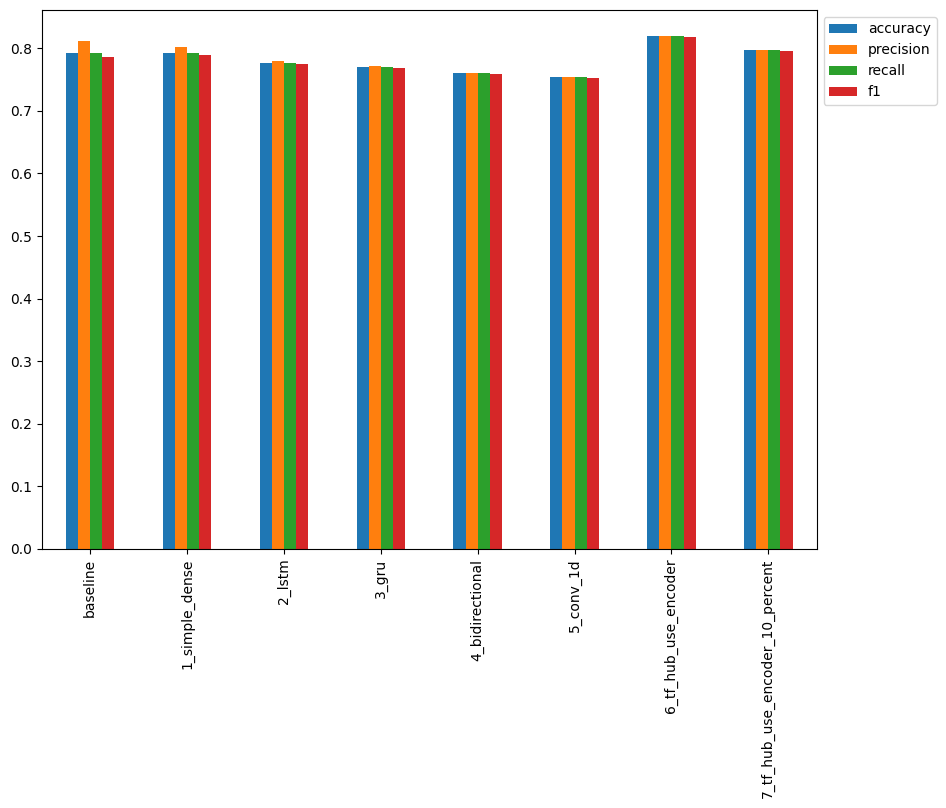

In [ ]:
#Plot and compare all the model results
all_model_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0));

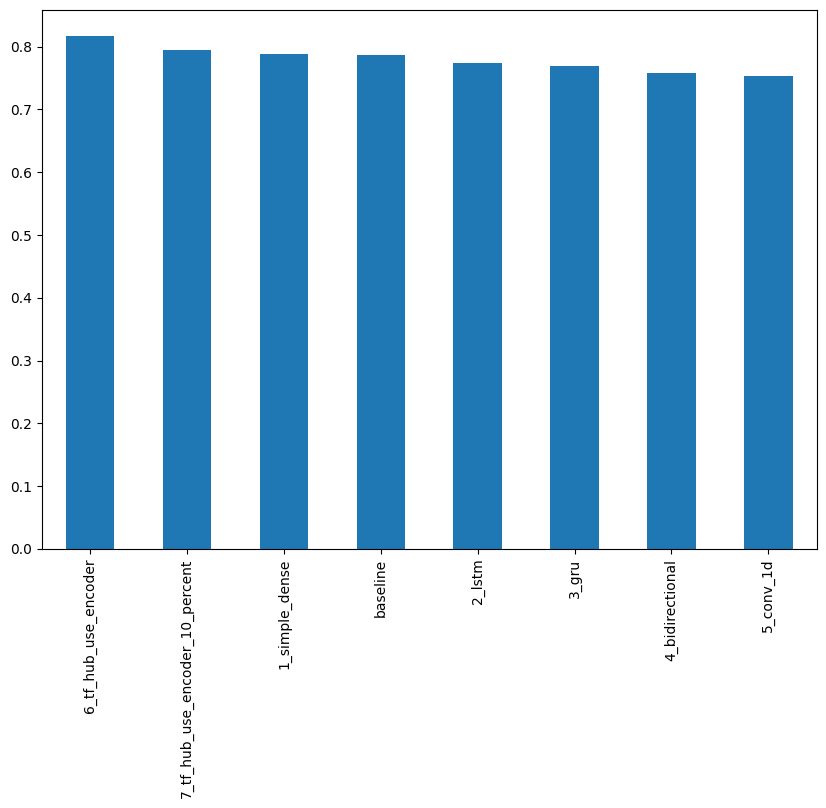

In [ ]:
#Sort model results by F1 score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10,7));

##Uploading the model training logs to TensorBoard.dev

In [ ]:
# View the tensorboard logs of transfer learning modelling experiments (plus all of our other models)
# upload tensorflow dev records
!tensorboard dev upload --logdir ./model_logs/ \
  --name "NLP Modelling Experiments TF" \
  --description "Comparing multiple different types of model architecture on the kaggle tweets text classification dataset" \
  --one_shot

In [ ]:
# see the previous Tensorboard experiments that you have run
#!tensorboard dev list

In [ ]:
# For to delete an experiment from TensorBoard
#!tensorboard dev delete --experiment_id zda2zUQ8RAOgzg8J0UGC6w

##Saving and loading a trained model

There are two main formats to save a model to in Tensorflow:

1. The HDF5 format
2. The 'SavedModel' format (default when using tensorflow)

In [ ]:
# Save TF Hub sentence encoder model to HDF5 format
model_6.save("model_6.h5")

In [ ]:
# Load model with custom Hub layer (required HDF5 format)
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [ ]:
# How does our loaded model perform?
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 21ms/step - loss: 0.4234 - accuracy: 0.8189


[0.4233517348766327, 0.8188976645469666]

In [ ]:
model_6_results

{'accuracy': 81.88976377952756,
 'precision': 0.8203089036947304,
 'recall': 0.8188976377952756,
 'f1': 0.8177314483416845}

###Now lets use the SavedModel format

In [ ]:
# Save TF hub sentence Encoder model to SavedModel format (default)
model_6.save("model_6_SavedModel_format")

In [ ]:
#Load in model from the save dmodel format
loaded_model_6_SavedModel_format = tf.keras.models.load_model("model_6_SavedModel_format")

In [ ]:
#Evaluate_model_6_SAvedModel_format
loaded_model_6_SavedModel_format.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4234 - accuracy: 0.8189


[0.4233517646789551, 0.8188976645469666]

##The Speed/Score tradeoff

In [ ]:
#Lets make a function to measure the time of prediction import time
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make prediction on samples.
  """
  strat_time = time.perf_counter() # get start time
  model.predict(samples) #make prediction
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculate how long prediction took to make
  time_per_pred = total_time/len(samples)
  return total_time, time_per_pred

In [ ]:
#calculate TF hub sentences Encoder time per pred
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model=model_6_pretrained,
                                                            samples=val_sentences)
model_6_total_pred_time, model_6_time_per_pred

In [ ]:
#calculate the baseline model times pred
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

In [ ]:
#Get results for pretrained GS model
model_6_pretrained_results = calculate_results(y_true=val_labels,
                                               y_pred=model_6_pretrained_preds)
model_6_pretrained_results

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_pretrained_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-score");